In [66]:
import matplotlib.pyplot as plt
import numpy as np

In [67]:
initial_heights = np.array([
    0.804, 0.807, 0.8, 0.8, 0.801, 0.673, 0.804, 0.804, 0.807, 0.415, 0.804
])

final_heights = np.array([
    1.9566144, 2.0401767, 1.97192, 2.12552, 2.2072356, 1.72288, 2.1624384, 2.1361476, 2.0918247, 1.1026135, 1.93161
])

change_in_heights = final_heights - initial_heights

separation_distances = np.array([
    19, 14, 6, 29, 53, 18, 36, 39, 27, 25, 5
]) / 1000

# # Excluding anomoly at sep distance of 19
# initial_heights = np.array([
#     0.807, 0.8, 0.8, 0.801, 0.673, 0.804, 0.804, 0.807, 0.415, 0.804
# ])

# final_heights = np.array([
#     2.0401767, 1.97192, 2.12552, 2.2072356, 1.72288, 2.1624384, 2.1361476, 2.0918247, 1.1026135, 1.93161
# ])

# change_in_heights = final_heights - initial_heights

# separation_distances = np.array([
#     14, 6, 29, 53, 18, 36, 39, 27, 25, 5
# ])

In [68]:
g = 9.81

approach_velocities = np.sqrt(2 * g * initial_heights)

separation_velocities = np.sqrt(2 * g * final_heights)

velocity_ratios = separation_velocities / approach_velocities

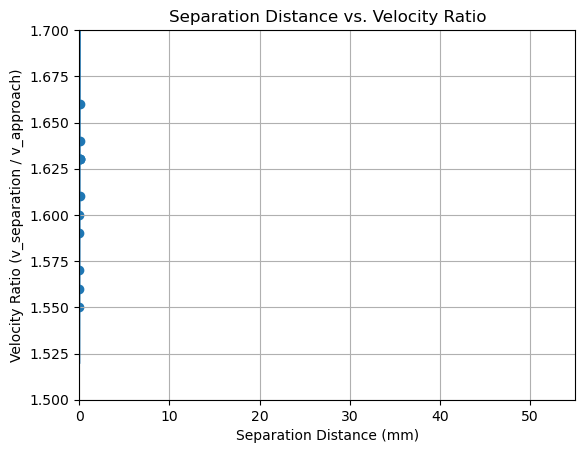

In [69]:
x = separation_distances
y = velocity_ratios

xlims = (0, 55)
ylims = (1.5, 1.70)

plt.scatter(x, y)

plt.xlim(xlims)
plt.ylim(ylims)


fixed_y_intercept = 1.52

# Adjust y values to account for the fixed intercept
adjusted_y = y - fixed_y_intercept

# Compute the slope with the fixed intercept
slope = np.sum(x * adjusted_y) / np.sum(x * x)

# Generate trendline values using the fixed intercept and computed slope
trendline_x = np.linspace(xlims, 100)
trendline_y = slope * trendline_x + fixed_y_intercept

plt.plot(trendline_x, trendline_y)

plt.title('Separation Distance vs. Velocity Ratio')
plt.xlabel('Separation Distance (mm)')
plt.ylabel('Velocity Ratio (v_separation / v_approach)')
plt.grid(True)
plt.show()

[2.21680028 1.55174974]


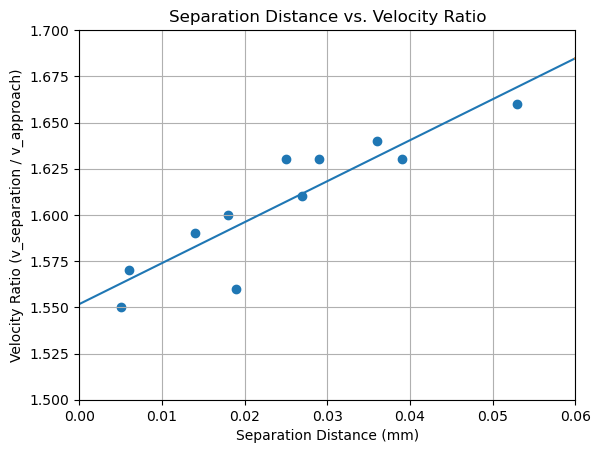

In [70]:
x = separation_distances
y = velocity_ratios

xlims = (0, 0.06)
ylims = (1.5, 1.70)

plt.scatter(x, y)

plt.xlim(xlims)
plt.ylim(ylims)

x_filtered = x[x != 19]
y_filtered = y[x != 19]

coefficients = np.polyfit(x_filtered, y_filtered, 1)
slope, intercept = coefficients
print(coefficients)

# Generate trendline values
trendline_x = np.linspace(xlims, 100)
trendline_y = slope * trendline_x + intercept

plt.plot(trendline_x, trendline_y)

plt.title('Separation Distance vs. Velocity Ratio')
plt.xlabel('Separation Distance (mm)')
plt.ylabel('Velocity Ratio (v_separation / v_approach)')
plt.grid(True)
plt.show()

0.042263570751691154 1.7716175083986163


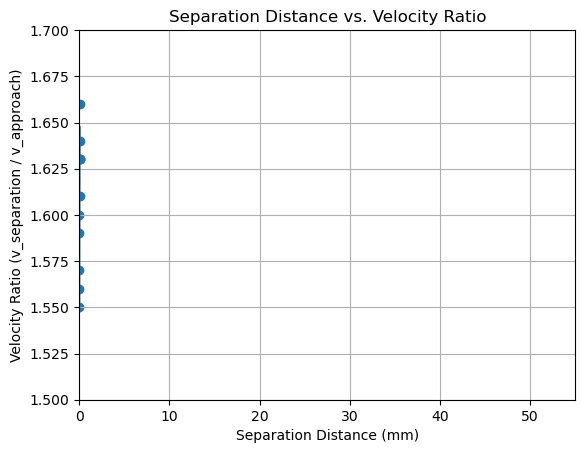

In [71]:
x = separation_distances
y = velocity_ratios

xlims = (0, 55)
ylims = (1.5, 1.70)

plt.scatter(x, y)

plt.xlim(xlims)
plt.ylim(ylims)

# Filter to avoid log(0) or log of negative numbers
x_positive = x[x != 19]
y_positive = y[x != 19]

# Perform the logarithmic fit: y = a * ln(x) + b
log_x = np.log(x_positive)
coefficients = np.polyfit(log_x, y_positive, 1)
a, b = coefficients  # a is the slope, b is the intercept
print(a,b)

# Generate logarithmic trendline
trendline_x = np.linspace(min(x_positive), max(x_positive), 100)
trendline_y = a * np.log(trendline_x) + b

plt.plot(trendline_x, trendline_y)

plt.title('Separation Distance vs. Velocity Ratio')
plt.xlabel('Separation Distance (mm)')
plt.ylabel('Velocity Ratio (v_separation / v_approach)')
plt.grid(True)
plt.show()